<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


In [4]:
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install scipy
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------------- ------------------------- 3.7/9.8 MB 21.7 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.8 MB 15.3 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/9.8 MB 12.1 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.8 MB 9.1 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.8 MB 7.3 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 6.4 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.8 MB 5.8 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 

#### Import the required libraries we need for the lab.


In [5]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [6]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



In [30]:
boston_df.shape

(506, 14)

In [43]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [50]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


# Task 2: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

* For the "Median value of owner-occupied homes" provide a boxplot

* Provide a  bar plot for the Charles river variable

* Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

* Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of * non-retail business acres per town. What can you say about the relationship?

* Create a histogram for the pupil to teacher ratio variable 

Text(0.5, 1.0, 'Median value of owner-occupied homes in $1000s')

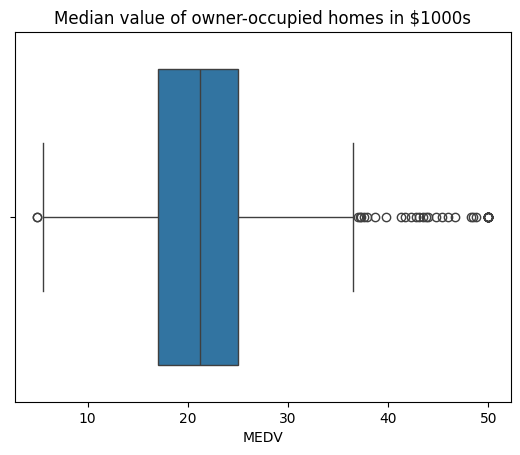

In [53]:
# For the "Median value of owner-occupied homes" provide a boxplot

sns.boxplot(x='MEDV', data=boston_df).set_title('Median value of owner-occupied homes in $1000s')

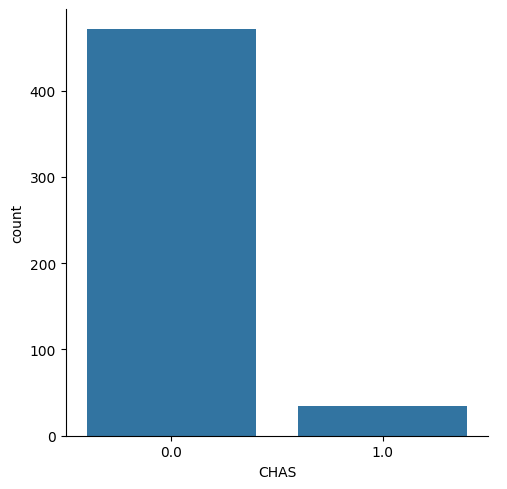

In [55]:
# Provide a bar plot for the Charles river variable

sns.catplot(data=boston_df, x='CHAS', kind='count')

<Axes: xlabel='MEDV', ylabel='age_group'>

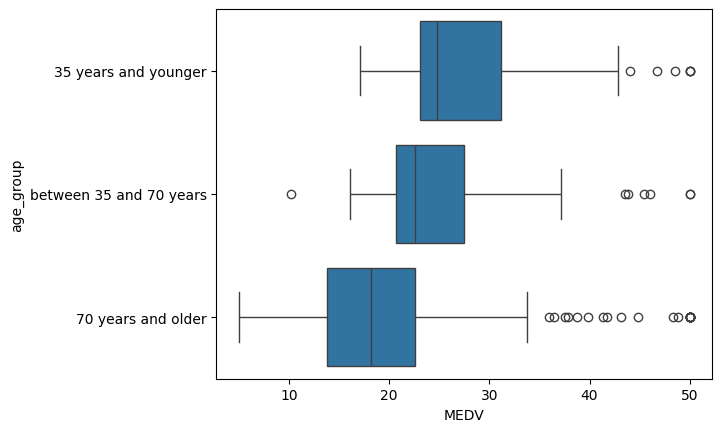

In [61]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, 
# between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

sns.boxplot(data=boston_df, y = 'age_group', x='MEDV', order = ['35 years and younger','between 35 and 70 years','70 years and older'])

<Axes: xlabel='NOX', ylabel='INDUS'>

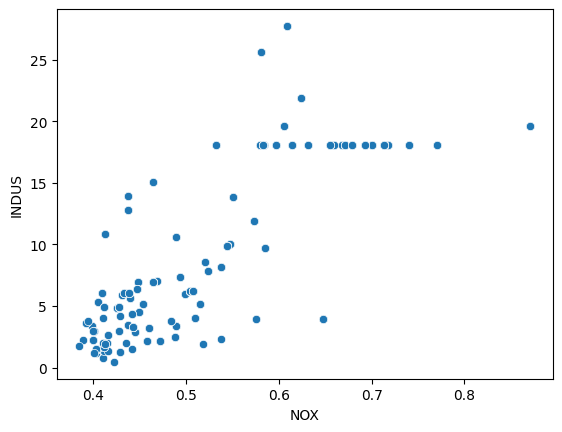

In [68]:
#Provide a scatter plot to show the relationship
# between Nitric oxide concentrations and the proportion of
# non-retail business acres per town. What can you say about the relationship?

sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

#The data appears to be correlated up to a point where INDUS reaches about 18, then higher NOX levels continue to rise without an increase in INDUS

<Axes: xlabel='PTRATIO', ylabel='Count'>

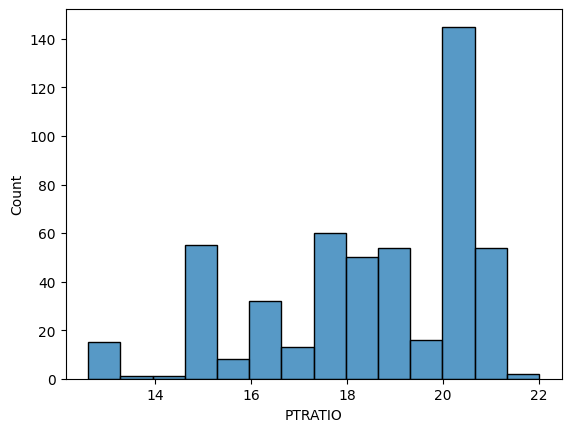

In [75]:

# Create a histogram for the pupil to teacher ratio variable
sns.histplot(x='PTRATIO', data=boston_df, stat='count')

# Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions;

* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.
Use α = 0.05
Perform the test Statistics.
State the conclusion from the test.

In [77]:
# Is there a significant difference in median value of houses bounded by the Charles river or not?
# (T-test for independent samples)

#H0 = no significant difference in median value of houses bounded by the Charles river
#H1 = there is a significant difference in median value of houses bounded by the Charles river

scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

TtestResult(statistic=np.float64(3.996437466090509), pvalue=np.float64(7.390623170519905e-05), df=np.float64(504.0))

In [78]:

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

# Since the p-value is below 0.05, I reject the null hypothesis as there is a difference in median value of houses bounded by the Charles river


TtestResult(statistic=np.float64(3.996437466090509), pvalue=np.float64(7.390623170519905e-05), df=np.float64(504.0))

In [79]:
#* Is there a difference in Median values of houses (MEDV) for each proportion
# of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#H0 = no difference in median value of houses for each proportion of owner occupied units built prior to 1940
#H1 = there is a difference in median value of houses for each proportion of owner occupied units built prior to 1940

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
# The p-value is more than 0.05, which means we cannot say the variances are different

LeveneResult(statistic=np.float64(2.7806200293748304), pvalue=np.float64(0.06295337343259205))

In [81]:
thirtyfive_lower_medv = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy_medv = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_higher_medv = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower_medv, thirtyfive_seventy_medv, seventy_higher_medv)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# Since the p-value is less than 0.05, we reject the null hypothesis as there is 
# significant evidence that there is a different in median values of houses
# for each proportion of owner occupied units built before 1940

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [82]:
#Can we conclude that there is no relationship between 
# Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#H0 = no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#H1 = there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# As the p-value is less than 0.05, we reject the null hypothesis as there is a relationship between NOX and INDUS

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241532e-98))

In [96]:
# What is the impact of an additional weighted distance to the five Boston employment centres
# on the median value of owner occupied homes? (Regression analysis)

#H0 = no impact of additional weighted distance to the five Boston employment centers on median value of owner occupied homes
#H1 = there is an impact of additional weighted distance to the five Boston employment centers on median value of owner occupied homes

x = boston_df['DIS'].tolist()
y = boston_df['MEDV'].tolist()

x = sm.add_constant(x)

result = sm.OLS(y,x).fit()

print(result.summary())

# The impact of DIS on MEDV is significant (p<0.05), DIS explains very little of the contribution to MEDV
# The impact is 1.0916, so each extra unit of distance adds $1091.60 of value.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        17:50:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

<Axes: xlabel='DIS', ylabel='MEDV'>

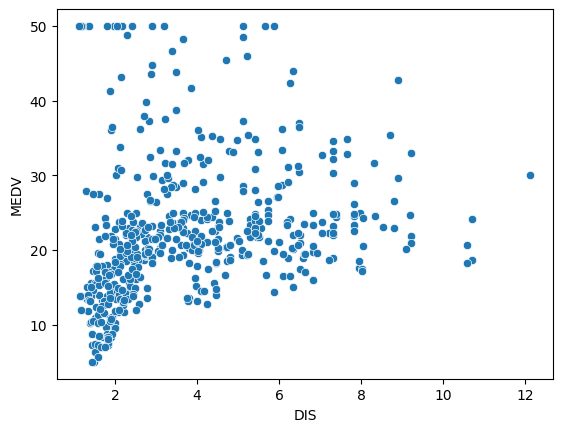

In [95]:
sns.scatterplot(data =boston_df,x='DIS',y='MEDV')